<h3>데이터셋</h3>

In [32]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [33]:
iris = load_iris()
iris_df = df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
iris_df.dropna()
print(iris_df.shape)
print(iris_df['target'].value_counts())

(150, 5)
target
0    50
1    50
2    50
Name: count, dtype: int64


In [35]:
iris_data = iris.data
iris_target = iris.target

In [36]:
sc = StandardScaler()

iris_data_scaled = sc.fit_transform(iris_data)

<h3>PCA</h3>

In [37]:
pca = PCA()
pca.fit(iris_data_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)

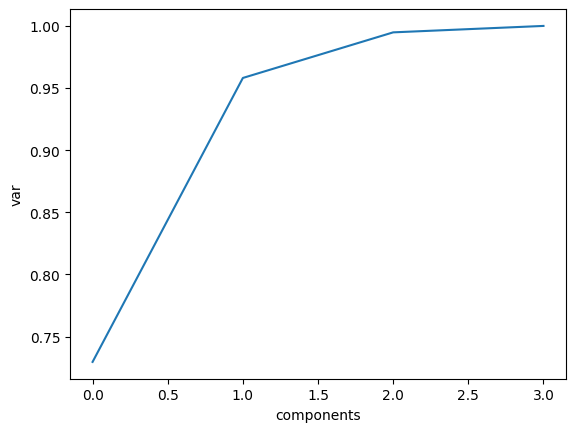

In [38]:
import matplotlib.pyplot as plt

plt.plot(cumsum)
plt.xlabel("components")
plt.ylabel("var")
plt.show()

In [39]:
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_data_scaled)

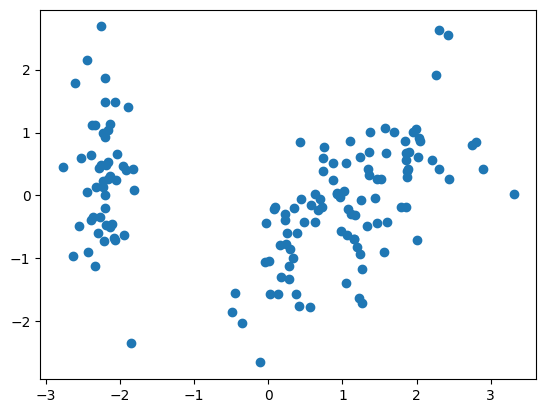

In [40]:
plt.scatter(iris_pca[:, 0], iris_pca[:, 1])

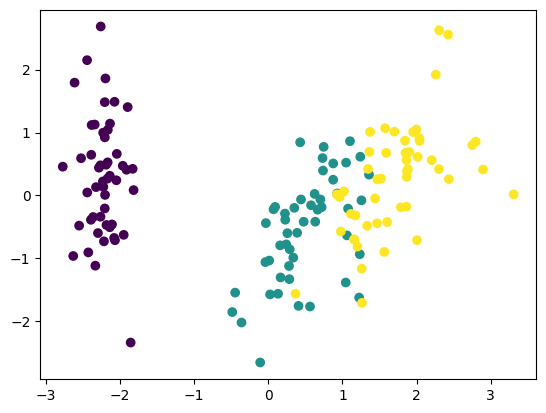

In [41]:
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=iris_target)

<h3>t-sne</h3>

In [42]:
tsne = TSNE(n_components=2)
iris_tsne = tsne.fit_transform(iris_data_scaled)

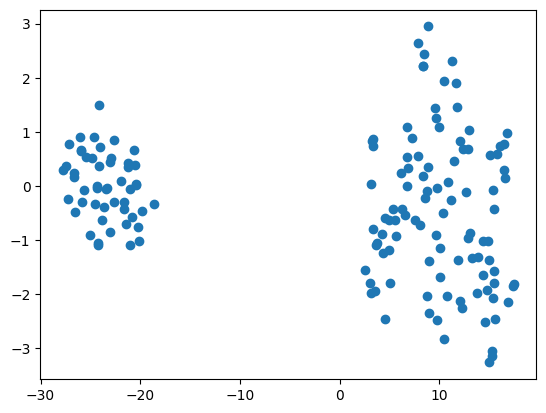

In [43]:
plt.scatter(iris_tsne[:, 0], iris_tsne[:, 1])

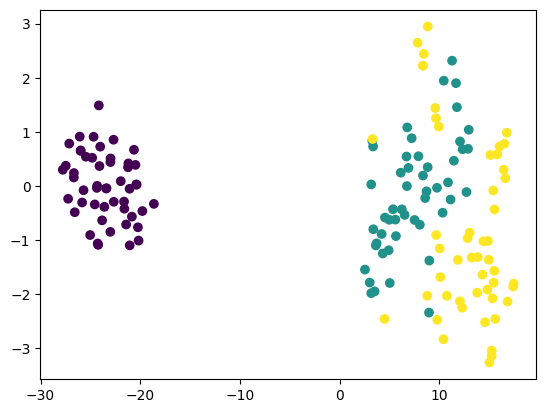

In [44]:
plt.scatter(iris_tsne[:, 0], iris_tsne[:, 1], c=iris_target)

<h3>3차원 tsne</h3>

In [45]:
tsne3 = TSNE(n_components=3)
iris_tsne3 = tsne3.fit_transform(iris_data_scaled)

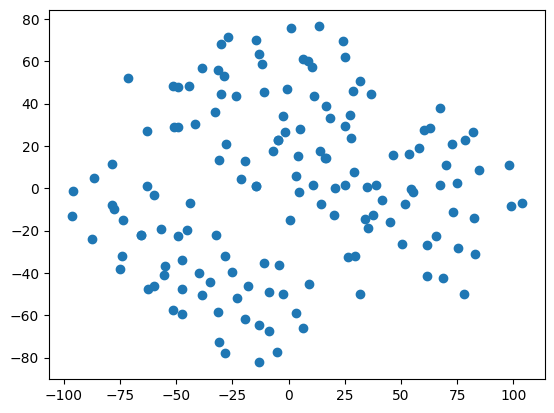

In [46]:
plt.scatter(iris_tsne3[:, 0], iris_tsne3[:, 1])

In [50]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(iris_data)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [51]:
cluster = km.labels_

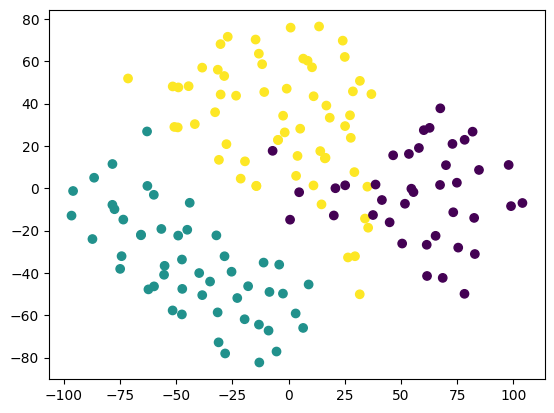

In [52]:
plt.scatter(iris_tsne3[:, 0], iris_tsne3[:, 1], c=cluster)

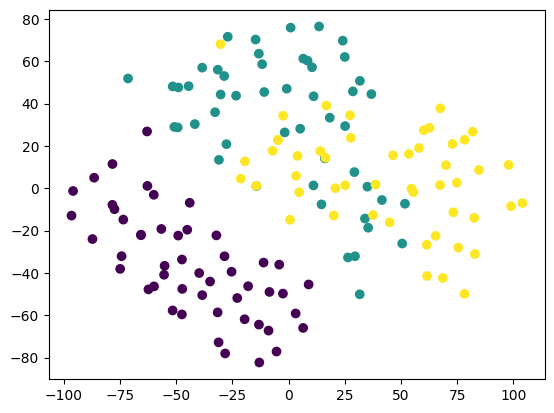

In [54]:
plt.scatter(iris_tsne3[:, 0], iris_tsne3[:, 1], c=iris_target)

<h3>UMAP</h3>

In [18]:
import umap.umap_ as umap

C:\Users\ipl1\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
reducer = umap.UMAP(n_components=2)
iris_umap = reducer.fit_transform(iris_data_scaled)

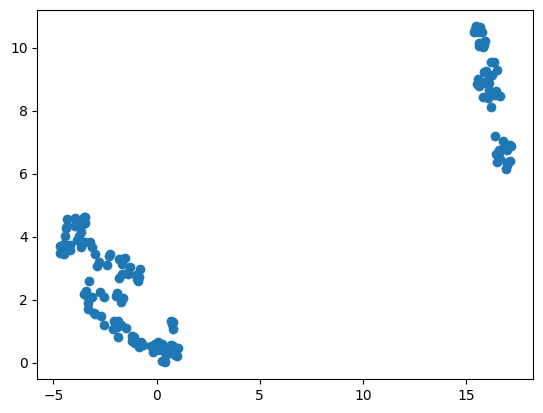

In [20]:
plt.scatter(iris_umap[:, 0], iris_umap[:, 1])

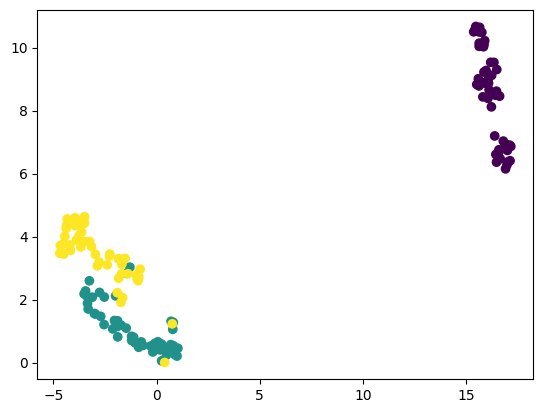

In [21]:
plt.scatter(iris_umap[:, 0], iris_umap[:, 1], c=iris_target)

<h3>KMeans</h3>

In [22]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(iris_data_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [19]:
cluster = km.labels_
print(cluster)

[1 2 2 2 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 2 2 1
 1 2 1 1 2 2 1 1 2 1 2 1 1 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


<h4>PCA 시각화</h4>

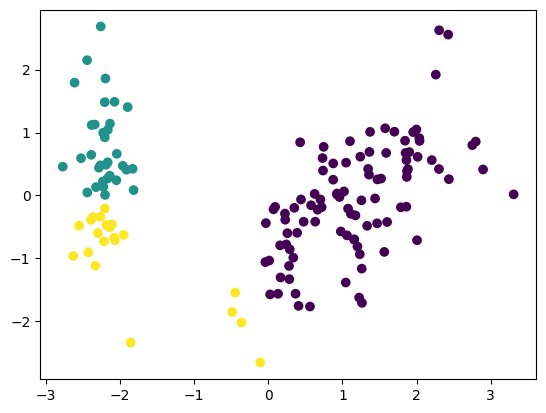

In [20]:
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=cluster)

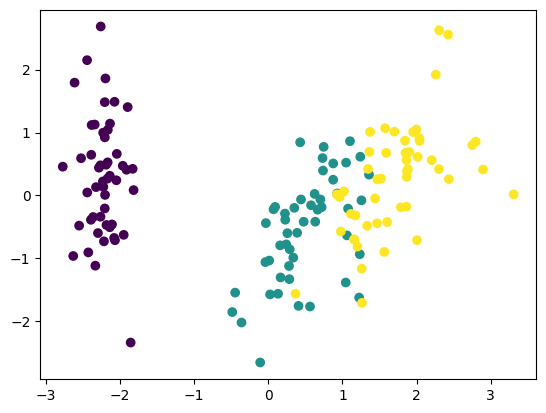

In [21]:
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=iris_target)

In [22]:
print(pd.crosstab(iris.target, cluster))

col_0   0   1   2
row_0            
0       0  33  17
1      46   0   4
2      50   0   0


<h4>t-sne 시각화</h4>

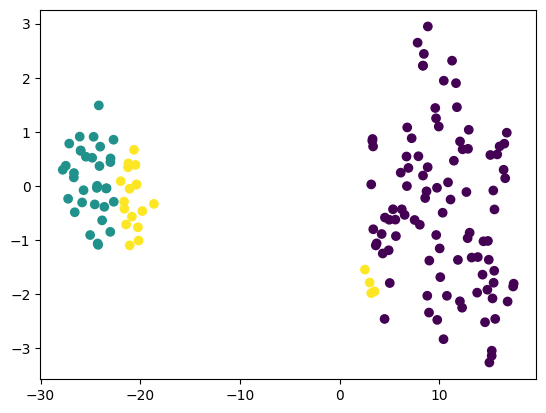

In [23]:
plt.scatter(iris_tsne[:, 0], iris_tsne[:, 1], c=cluster)

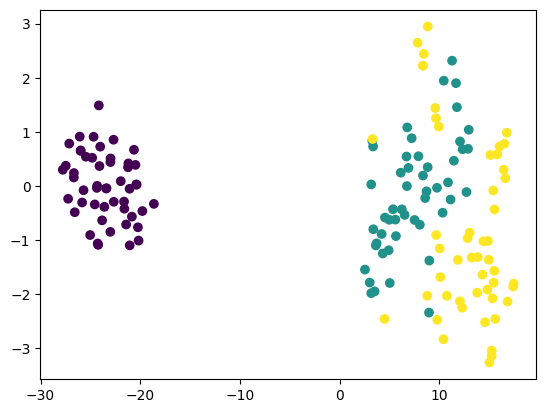

In [24]:
plt.scatter(iris_tsne[:, 0], iris_tsne[:, 1], c=iris_target)

<h3>UMAP</h3>

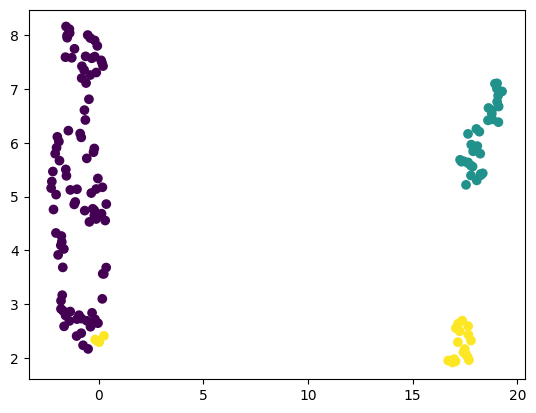

In [25]:
plt.scatter(iris_umap[:, 0], iris_umap[:, 1], c=cluster)

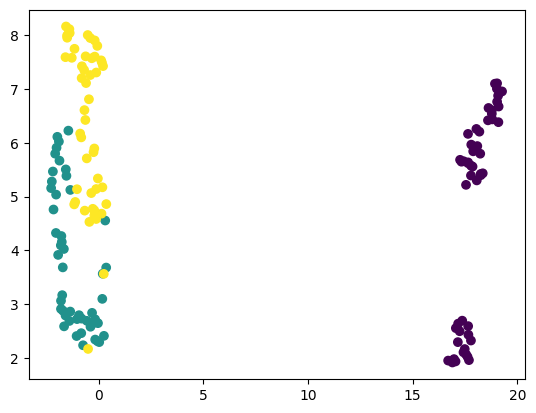

In [27]:
plt.scatter(iris_umap[:, 0], iris_umap[:, 1], c=iris_target)

<h3>pca -> K-Means</h3>

In [23]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(iris_pca)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


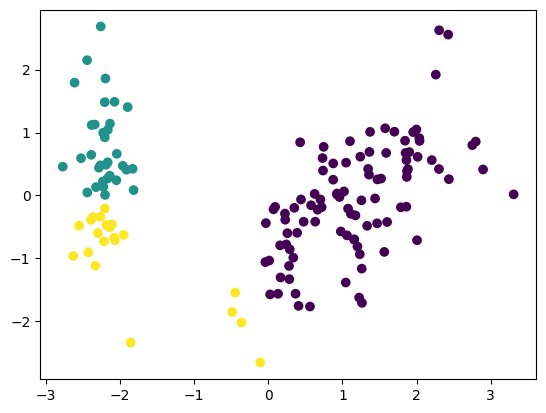

In [24]:
cluster = km.labels_
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=cluster)

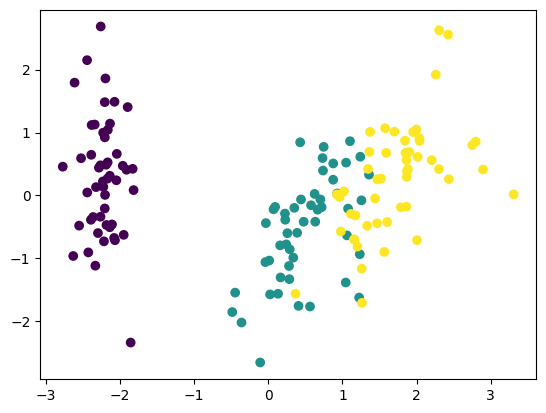

In [25]:
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=iris_target)

<h3>t_sne -> K-Means</h3>

In [26]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(iris_tsne)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


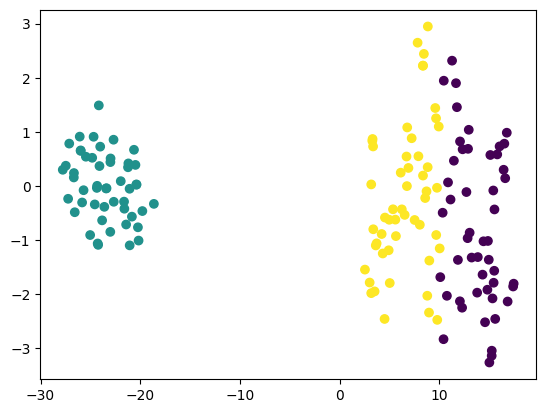

In [27]:
cluster = km.labels_
plt.scatter(iris_tsne[:, 0], iris_tsne[:, 1], c=cluster)

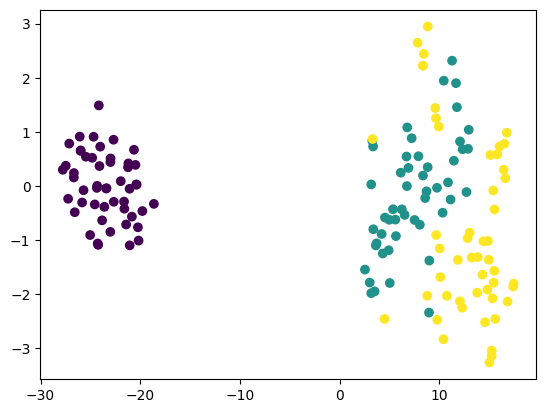

In [28]:
plt.scatter(iris_tsne[:, 0], iris_tsne[:, 1], c=iris_target)

<h3>UMAP -> K-Means</h3>

In [29]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(iris_umap)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


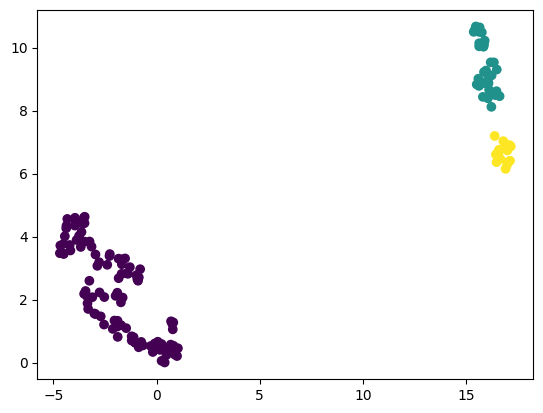

In [30]:
cluster = km.labels_
plt.scatter(iris_umap[:, 0], iris_umap[:, 1], c=cluster)

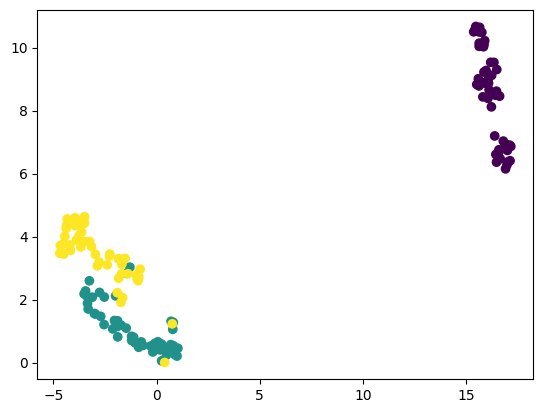

In [31]:
cluster = km.labels_
plt.scatter(iris_umap[:, 0], iris_umap[:, 1], c=iris_target)

<h3>3차원 tsne->kmenas</h3>

In [47]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(iris_tsne3)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


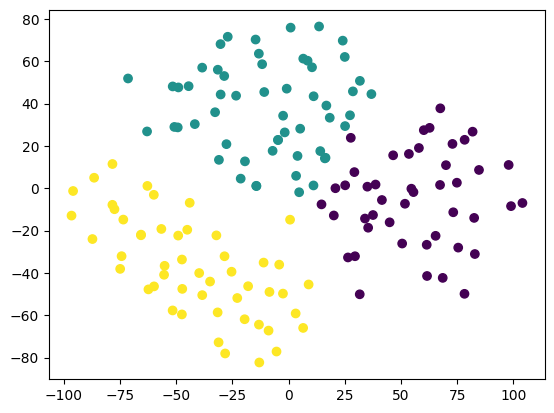

In [48]:
cluster = km.labels_
plt.scatter(iris_tsne3[:, 0], iris_tsne3[:, 1], c=cluster)

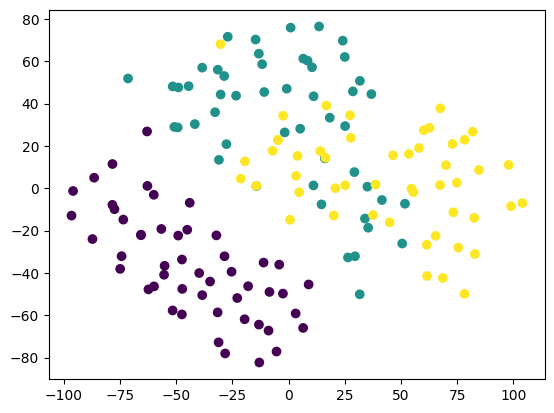

In [49]:
plt.scatter(iris_tsne3[:, 0], iris_tsne3[:, 1], c=iris_target)